<a href="https://colab.research.google.com/github/Avneet-0001/Income_Predictor/blob/main/Finding_donors_for_charity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project: Finding Donors for *CharityML*

CharityML is a fictitious charity organization. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML wants to build an algorithm to best identify potential donors and reduce overhead cost of sending mail.

The goal will be :
* evaluate and optimize several different supervised learners
* determine which algorithm will provide the highest donation yield while also reducing the total number of letters being sent.

In this project, I employ several supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. I then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data.
Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, it can be inferred from other publically available features.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_.

## Data Exploration

In [ ]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

In [ ]:
# Fetching data from Drive

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to the file
file_path = '/content/drive/My Drive/Finding Donors Data Science project/census.csv'

# Load the file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()

Mounted at /content/drive


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [ ]:
file_path2 = '/content/drive/My Drive/Finding Donors Data Science project/visuals.py'

# Copy the file to the current directory
!cp "$file_path2" .

# Verify the file is in the current directory
!ls

# Import supplementary visualization code visuals.py
import visuals as vs

# List the contents of the visuals module
#dir(visuals)

drive  sample_data  visuals.py


In [ ]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = data.loc[data.income == ">50K"].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = data.loc[data.income == "<=50K"].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100, 2)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Description **

* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
# Getting information about the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [ ]:
# Summary of the int/float type variables in the dataset
data.describe() # include="all" to summarize both numeric and categorical variables

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<Axes: >

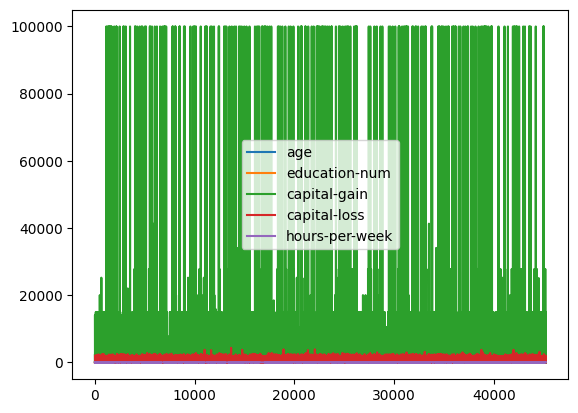

In [ ]:
data.plot()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

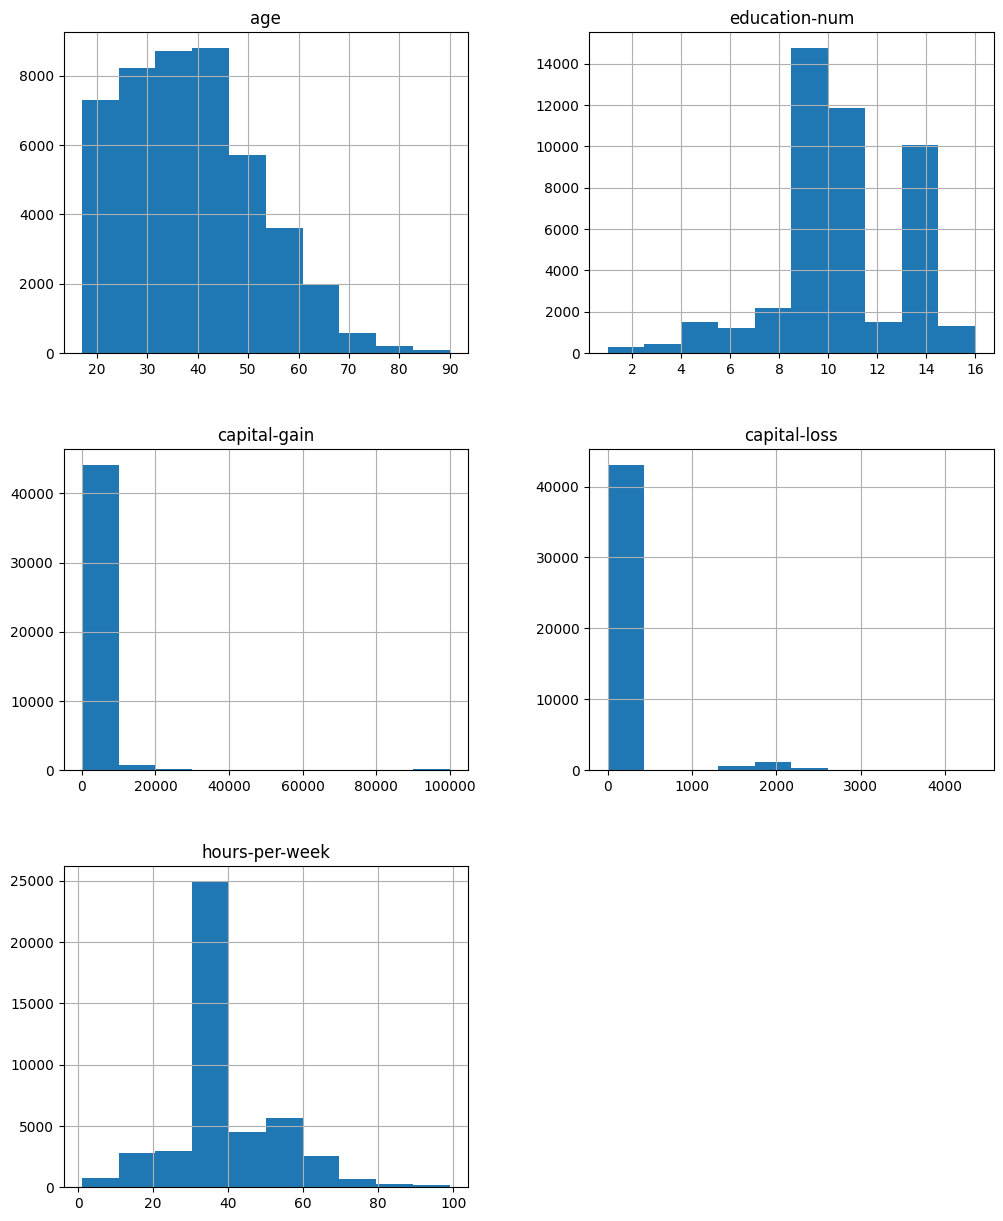

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize=(12,15))

---

Data Exploration Takeaways

1. Capital-loss,Capital-gain are skewed to the right. #Age
2. All numeric features should be normalized.
4. The target variable should be mapped into 1 and 0.
5. All categorical features should be one-hot encoded.
6. 24.78% individuals are making more than $50,000 indicates that the dataset is imbalanced.

## Data Preparation

### Transforming Skewed Continuous Features ('`capital-gain'` and `'capital-loss'`).

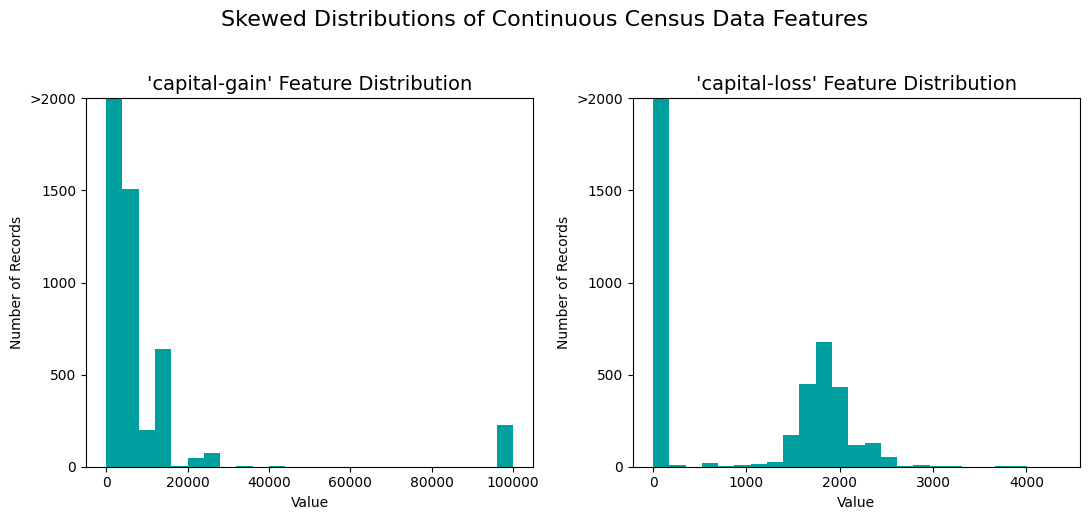

In [ ]:
# Split the data into features and response label
income_raw = data['income']
features_raw = data.drop('income', axis = 1) # axis=0 to drop row, axis=1 to drop column

# Visualize skewed continuous features of original data
vs.distribution(data)

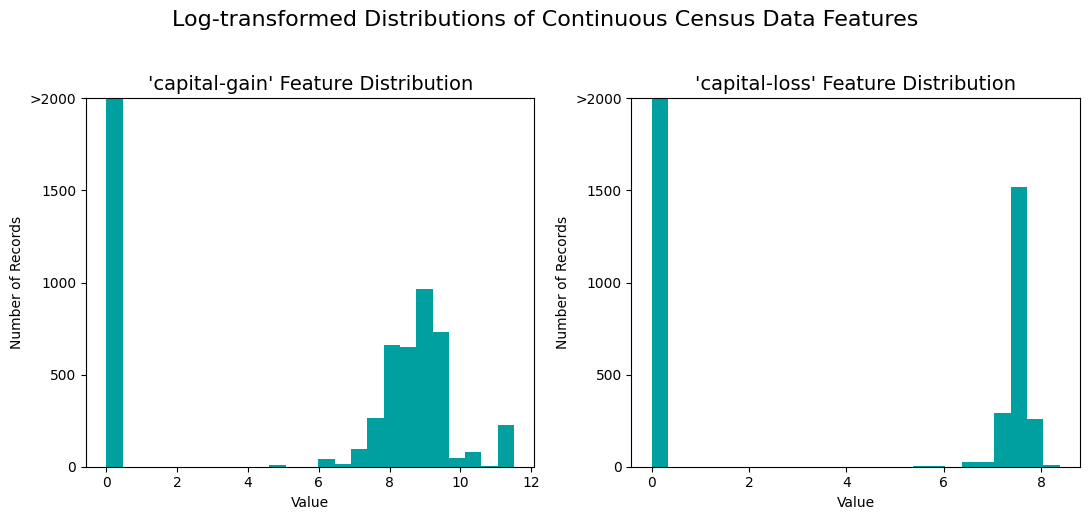

In [ ]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1)) # applies a lambda function to each specified column, +1 in log ensures that we don't take log(0)

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the logarithm successfully.

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# 10 records with scaling applied
display(features_log_minmax_transform.head(n = 10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba
5,0.273973,Private,Masters,0.866667,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.000000,0.0,0.397959,United-States
6,0.438356,Private,9th,0.266667,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.000000,0.0,0.153061,Jamaica
7,0.479452,Self-emp-not-inc,HS-grad,0.533333,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.448980,United-States
8,0.191781,Private,Masters,0.866667,Never-married,Prof-specialty,Not-in-family,White,Female,0.829751,0.0,0.500000,United-States
9,0.342466,Private,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.742849,0.0,0.397959,United-States


### One-hot encoding of Categorical features

One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature.

Additionally, we need to convert the categorical response variable, `'income'` to numerical values. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

In [ ]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(data=features_log_minmax_transform, columns=['workclass', 'education_level', 'marital-status', 'occupation', 'relationship','race','sex','native-country'])

# Encode the 'income_raw' data to numerical values
income = income_raw.apply(lambda x: 1 if (x == '>50K') else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Split Data
We now split the data into training and test sets. 80% of the data will be used for training and 20% for testing.

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final,
                                                    income,
                                                    test_size = 0.2,
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.



## Evaluating Model Performance


### Metrics


* **Accuracy** measures how often the classifier makes a correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions.

 Accuracy $= \frac{\text{True Positives (TP) + True Negatives (TN)}}{\text{Total instances}}$

 Accuracy is useful when the classes are balanced, meaning the number of instances in each class is approximately equal. It can be misleading in the case of imbalanced datasets.

* **Precision** is the proportion of predicted Yes's that were actually Yes.

 Precision $= \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}}$

 Precision is important in scenarios where the cost of false positives is high. In this case, Precision measures the proportion of people predicted to earn more than $50,000 who actually do. High precision ensures that most of the letters sent out go to the right people, minimizing wasted costs.


* **Recall** is the proportion of actual Yes's that were predicted as Yes.

 Recall $= \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}}$

 Recall is crucial when the cost of false negatives is high. In this case, Recall measures the proportion of people who earn more than $50,000 who are correctly identified. High recall ensures that most potential donors are targeted, minimizing missed opportunities.

* **F-beta Score** is the harmonic mean of precision and recall, providing a single metric that considers both.

 $$ F_{\beta} = (1 + \beta^2) \cdot \frac{\text{Precision} \cdot \text{Recall}}{\left( \beta^2 \cdot \text{Precision} \right) + \text{Recall}} $$

 F-beta Score is crucial when the cost of both false positives and false negatives is high. Moreover, F-beta Score is a preferred metric if classes are unbalanced.

Given that missing a potential donor (false negative) might be more costly than sending a letter to a non-donor (false positive), the F2 score, which puts more emphasis on recall, would be a suitable choice. This way, we can ensure that we identify most of the potential donors even if it means sending a few extra letters to non-donors.

## Model development

### Creating a Training and Predicting Pipeline


In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # Fitting the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    # Calculate the training time
    results['train_time'] = end - start

    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time

    # Total prediction time
    results['pred_time'] = end - start

    # Accuracy on the first 300 training samples, y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)

    # Accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=2)

    # F-score on the test set, y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=2)

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

### Naive Predictor

We generate a naive predictor to show what a base model without any intelligence would look like. Let this naive model always predict '1' (i.e. the individual makes more than 50k). Then this model will have no True Negatives(TN) or False Negatives(FN) it does not make any negative('0' value) predictions. Therefore, Accuracy in this case becomes the same as Precision (True Positives/(True Positives + False Positives)) as every prediction with value '1' that should have '0' becomes a False Positive; therefore the denominator in this case is the total number of records.
The Recall score (True Positives/(True Positives + False Negatives)) in this setting becomes 1 as there are no False Negatives.

In [ ]:
"""
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

accuracy = (TP+TN)/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

fscore = (1+(2**2))*(precision*recall)/(((2**2)*precision)+recall)

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))
"""

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.6223]


In [39]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score

# Generate naive predictions (all ones)
naive_predictions = np.ones(income.shape)

# True values
y_true = income

# Naive predictions (all ones)
y_pred = naive_predictions

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate F-score with beta=2
fscore = fbeta_score(y_true, y_pred, beta=2)

print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.6223]


### Machine Learning Models

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier

# Initialize the three models
clf_A = AdaBoostClassifier(random_state=1)
clf_B = SVC(random_state=1)
clf_C = LogisticRegression(random_state=1)
clf_D = xgb.XGBClassifier(random_state=1) #Default params: max_depth=3, learning_rate=0.1, n_estimators=100
clf_E = KNeighborsClassifier()


# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
samples_100 = len(y_train)
# samples_10 is 10% of samples_100
samples_10 = int(len(y_train)/10)
# samples_1 is 1% of samples_100
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__ # To get the name of the class from which an object was instantiated (in string format). Ex: clf_name = "AdaBoostClassifier" for clf_A = AdaBoostClassifier(random_state=1)
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# results = {clf_A: {0:{'train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test'}, 1:{'train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test'}, 2:{'train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test'}}, clf_B: {}, clf_C: {},...}
# 0 corresponds to samples_1, 1 corresponds to sample_10, and 2 corresponds to sample_100

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression trained on 36177 samples.
XGBClassifier trained on 361 samples.
XGBClassifier trained on 3617 samples.
XGBClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


In [ ]:
# Run metrics visualization for the three supervised learning models chosen
#vs.evaluate(results, accuracy, fscore)

In [ ]:
print(results)

{'AdaBoostClassifier': {0: {'train_time': 0.25577616691589355, 'pred_time': 0.36696672439575195, 'acc_train': 0.8933333333333333, 'acc_test': 0.8206744057490326, 'f_train': 0.7183908045977012, 'f_test': 0.5980419322065207}, 1: {'train_time': 0.6015059947967529, 'pred_time': 0.5583896636962891, 'acc_train': 0.84, 'acc_test': 0.849861802100608, 'f_train': 0.5473372781065089, 'f_test': 0.6324369905368687}, 2: {'train_time': 6.8386712074279785, 'pred_time': 0.17341065406799316, 'acc_train': 0.85, 'acc_test': 0.8576008844665561, 'f_train': 0.5522388059701492, 'f_test': 0.6299100804543303}}, 'SVC': {0: {'train_time': 0.012754440307617188, 'pred_time': 0.21843266487121582, 'acc_train': 0.8533333333333334, 'acc_test': 0.8180210060807076, 'f_train': 0.5182926829268292, 'f_test': 0.4399002493765587}, 1: {'train_time': 0.5532934665679932, 'pred_time': 1.5844817161560059, 'acc_train': 0.86, 'acc_test': 0.8316196793808734, 'f_train': 0.591715976331361, 'f_test': 0.5475047984644914}, 2: {'train_time

In [ ]:
print("AdaBoost F-score: {}".format(results['AdaBoostClassifier'][2]['f_test']))
print("XGBoost F-score: {}".format(results['XGBClassifier'][2]['f_test']))
print("AdaBoost Accuracy score: {}".format(results['AdaBoostClassifier'][2]['acc_test']))
print("XGBoost Accuracy score: {}".format(results['XGBClassifier'][2]['acc_test']))

AdaBoost F-score: 0.6299100804543303
XGBoost F-score: 0.6780058101396309
AdaBoost Accuracy score: 0.8576008844665561
XGBoost Accuracy score: 0.8715312327252626


In [ ]:
def evaluate(results):
    import matplotlib.patches as mpatches
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (15,8))
    # Constants
    bar_width = 0.18
    colors = ['#A00000','#00A0A0','#00A000', 'navy', 'yellow'] #['navy','yellow','green']

    # Super loop to plot four panels of data
    # Selects a learner, select a metric, plots for different sample sizes, changes the metric, plots for different sample sizes,...
    for k, learner in enumerate(results.keys()):
      # k is the index (0, 1, 2, ...)
      # learner is the name of the learning algorithm (e.g., 'DecisionTree', 'SVM')
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
          # j is the index (0, 1, 2, ...)
          # metric is the name of the metric to be plotted (e.g., 'train_time', 'acc_train')
            for i in np.arange(3):
                # i is the index for the sample sizes (0, 1, 2)
                # 0 corresponds to 1% of the training data
                # 1 corresponds to 10% of the training data
                # 2 corresponds to 100% of the training data
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                # i places the bar based on the sample size, and k * bar_width offsets the bar for different learners.
                # results[learner][i][metric]: Retrieves the value to plot from the results dictionary results = {clf_A: {0:{'train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test'}, 1:{'train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test'}, 2:{'train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test'}}, clf_B: {}, clf_C: {},...}.
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0)) # Sets the x-axis limits to ensure the bars are centered properly.

    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    plt.tight_layout()
    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 5, fontsize = 'x-large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.show()

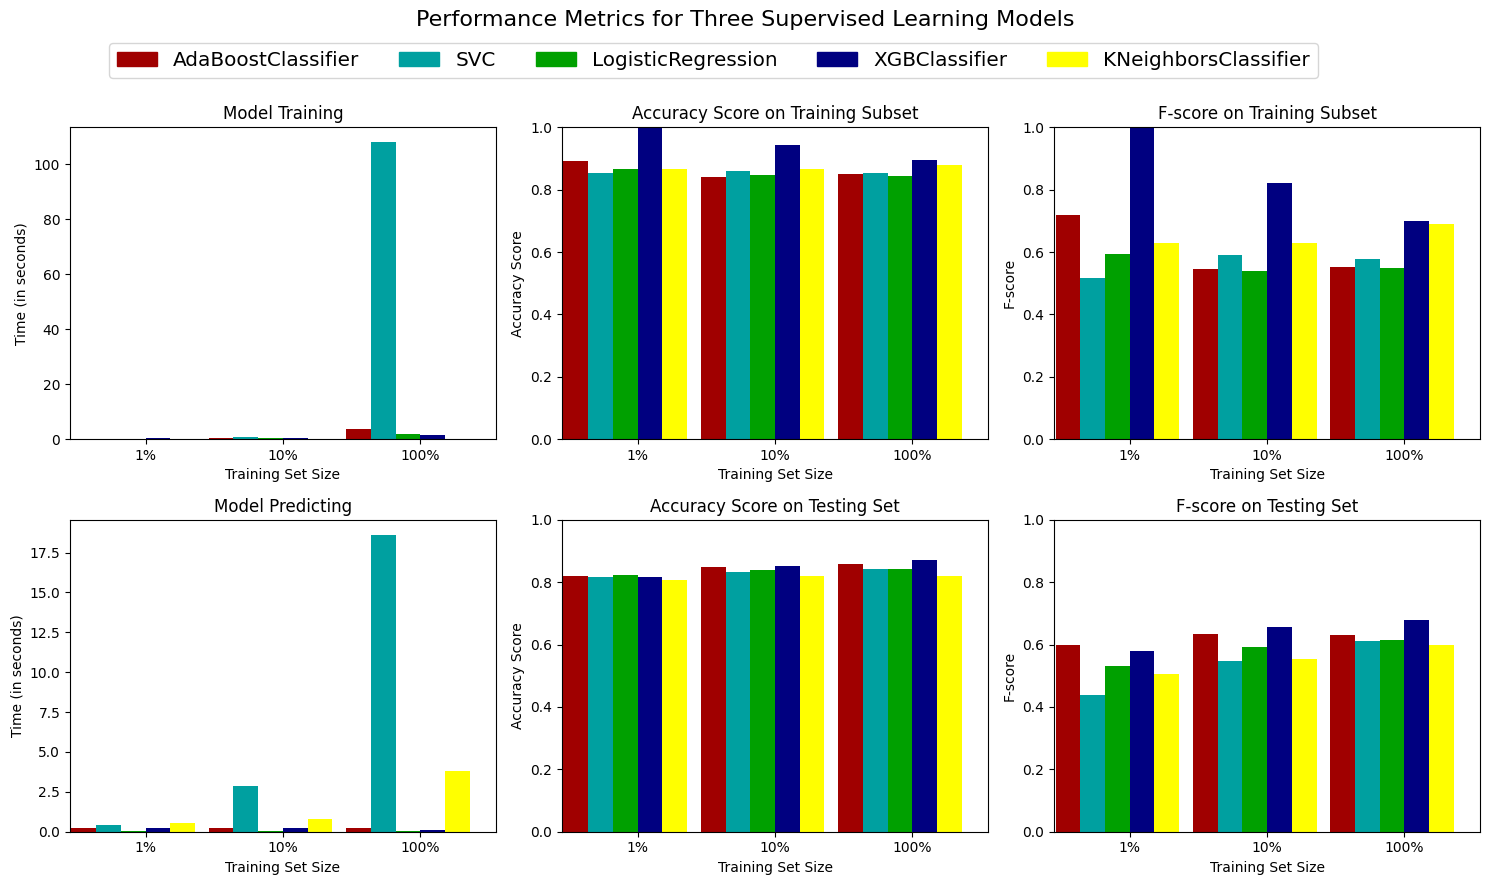

In [ ]:
evaluate(results)

* Among the models tested, the Support Vector Classifier (SVC) takes the longest time to train. This is likely due to the complexity of the SVC algorithm, which involves solving a quadratic programming problem.
* XGBoost outperforms other models in terms of both accuracy and F-score on the training and testing sets. Specifically, the F-score on the test set is 0.6780.
* While AdaBoost also performs well, it is slightly behind XGBoost. The F-score on the test set for AdaBoost is 0.6299.
* XGBoost's F-score on the test set is approximately 5% higher than that of AdaBoost. This demonstrates XGBoost's superior ability to handle complex data patterns and interactions. Despite the performance advantage, tuning XGBoost can be computationally expensive and time-consuming due to its complexity.

Given the strong performance of both models, we will proceed with hyperparameter tuning for both XGBoost and AdaBoost. While XGBoost is a more sophisticated model and may require more time and resources to tune, its potential for higher performance justifies this effort. On the other hand, AdaBoost, being simpler, may offer quicker tuning and deployment.

## Model Tuning


## Grid search Adaboost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier

# Initialize the classifier
clf = AdaBoostClassifier(random_state=42)

# Parameters list to tune
parameters = {'n_estimators' : [500,600,700,800,900], 'learning_rate' : [0.01,0.1,1.0,2.0,3.0]} #{'n_estimators' : [50,100,200,250], 'learning_rate' : [0.1,0.5,1.0,1.5]}

# fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

# Grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))



Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.6299

Optimized Model
------
Final accuracy score on the testing data: 0.8666
Final F-score on the testing data: 0.6590


In [ ]:
print("Optimal n_estimators: ", grid_fit.best_params_['n_estimators'])
print("Optimal learning_rate: ", grid_fit.best_params_['learning_rate'])

Optimal n_estimators:  250
Optimal learning_rate:  1.5


## Randomized search AdaBoost

In [37]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Initialize the classifier
clf =  AdaBoostClassifier(random_state=1)

# Parameters list
parameters = {'n_estimators' : [500,600,700,800,900], 'learning_rate' : [0.01,0.1,1.0,2.0,3.0]}

random_obj = RandomizedSearchCV(clf, parameters)

# Fit the random search object to the training data and find the optimal parameters using fit()
random_fit = random_obj.fit(X_train, y_train)

# Get the estimator
best_clf = random_fit.best_estimator_

# Predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))



Unoptimized model
------
Accuracy score on testing data: 0.8576
F-score on testing data: 0.6299

Optimized Model
------
Final accuracy score on the testing data: 0.8668
Final F-score on the testing data: 0.6629


In [40]:
best_predictions2 = best_clf.predict(X_train)
print("Final F-score on the training data: {:.4f}".format(fbeta_score(y_train, best_predictions2, beta = 2)))

Final F-score on the training data: 0.6790


In [41]:
print("Optimal n_estimators: ", random_fit.best_params_['n_estimators'])
print("Optimal learning_rate: ", random_fit.best_params_['learning_rate'])

Optimal n_estimators:  700
Optimal learning_rate:  1.0


#### Results for AdaBoost

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: |
| Accuracy Score |      0.8576       |     0.8668      |
| F-score        |      0.6299       |     0.6629      |


The optimized model accuracy and F-score are 0.8668 and 0.6629 respectively which are better than the unoptimized values that are 0.8576 and 0.6299.

In [ ]:
""" GridSearch tends to be slower than RandomizedSearch.

from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Initialize the classifier
clf =  xgb.XGBClassifier(random_state=1)

# Create the parameters list
parameters = {
    "learning_rate" : [0.1, 0.5, 1],
    "n_estimators": [300,400],
    'max_depth': [3, 5],
    'gamma' : [0.1, 0.3],
    'max_delta_step' : [1,3]
}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=2)

# Grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
"""

' GridSearch tends to be slower than RandomizedSearch.\n\nfrom sklearn.metrics import make_scorer\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.model_selection import GridSearchCV\nimport xgboost as xgb\n\n# Initialize the classifier\nclf =  xgb.XGBClassifier(random_state=1)\n\n# Create the parameters list\nparameters = {\n    "learning_rate" : [0.1, 0.5, 1],\n    "n_estimators": [300,400],\n    \'max_depth\': [3, 5],\n    \'gamma\' : [0.1, 0.3],\n    \'max_delta_step\' : [1,3]\n}\n\n# Make an fbeta_score scoring object using make_scorer()\nscorer = make_scorer(fbeta_score, beta=2)\n\n# Grid search on the classifier using \'scorer\' as the scoring method using GridSearchCV()\ngrid_obj = GridSearchCV(clf, parameters, scoring=scorer)\n\n# Fit the grid search object to the training data and find the optimal parameters using fit()\ngrid_fit = grid_obj.fit(X_train, y_train)\n\n# Get the estimator\nbest_clf = grid_fit.best_estimator_\n\n# Predictions using the unoptim

## Randomized search XGBoost

In [ ]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

# Initialize the classifier
clf =  xgb.XGBClassifier(random_state=42)

# Create the parameters list
parameters = {
    "learning_rate" : [0.1, 1],
    "n_estimators": [50,300,400],
    'max_depth': [3, 5],
    'gamma' : [0.1, 0.3],
    'max_delta_step' : [1,3]
}

# Make an roc_auc_score scoring object using make_scorer()
#scorer = make_scorer(roc_auc_score)

# Perform random search on the classifier using 'scorer' as the scoring method using GridSearchCV()
random_obj = RandomizedSearchCV(clf, parameters)

# Fit the random search object to the training data and find the optimal parameters using fit()
random_fit = random_obj.fit(X_train, y_train)

# Get the estimator
best_clf = random_fit.best_estimator_

In [ ]:
# Predictions using the unoptimized and optimized model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))

Unoptimized model
------
Accuracy score on testing data: 0.8715
F-score on testing data: 0.6780

Optimized Model
------
Final accuracy score on the testing data: 0.8697
Final F-score on the testing data: 0.6684


In [ ]:
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Initialize the classifier
clf = xgb.XGBClassifier(random_state=42)

# Create the parameters list
parameters = {
    "learning_rate": [0.01, 0.1, 0.5, 1],
    "n_estimators": [50, 100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'gamma': [0, 0.1, 0.2, 0.3],
    'max_delta_step': [0, 1, 2, 3]
}

# Make an roc_auc_score scoring object using make_scorer()
scorer = make_scorer(roc_auc_score)

# Perform random search on the classifier using 'scorer' as the scoring method
random_obj = RandomizedSearchCV(clf, parameters, scoring=scorer, n_iter=20, cv=5, random_state=42, n_jobs=-1)

# Fit the random search object to the training data and find the optimal parameters using fit()
random_fit = random_obj.fit(X_train, y_train)

# Get the best estimator
best_clf = random_fit.best_estimator_

# Predictions using the unoptimized and optimized model
predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Before-and-after scores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta=2)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=2)))

# Print the best parameters found by RandomizedSearchCV
print("\nBest parameters found by RandomizedSearchCV\n------")
print(random_fit.best_params_)


Unoptimized model
------
Accuracy score on testing data: 0.8715
F-score on testing data: 0.6780

Optimized Model
------
Final accuracy score on the testing data: 0.8711
Final F-score on the testing data: 0.6764

Best parameters found by RandomizedSearchCV
------
{'n_estimators': 200, 'max_depth': 6, 'max_delta_step': 3, 'learning_rate': 0.1, 'gamma': 0.1}



## Feature Importance

In this project, we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

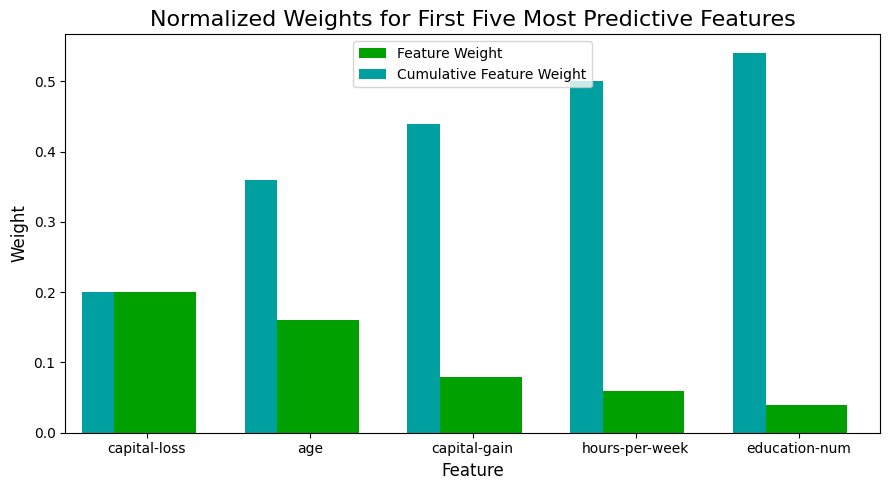

In [ ]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier(random_state = 1).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

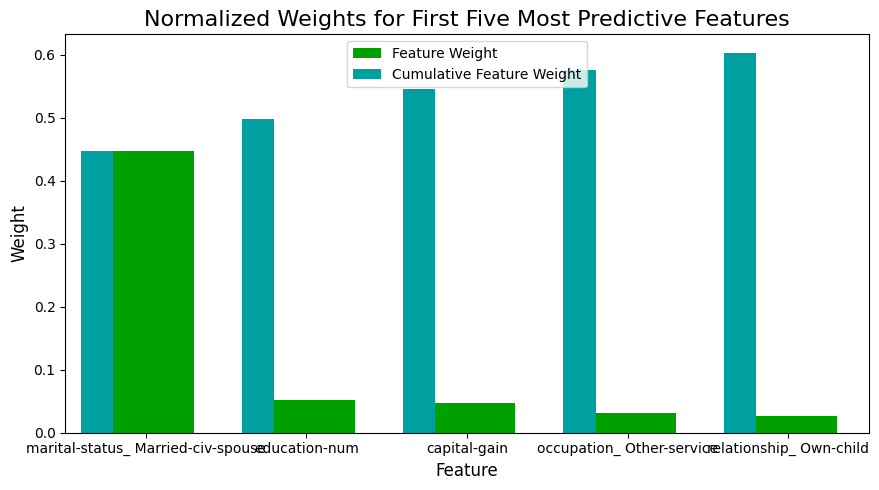

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Train the supervised model on the training set using .fit(X_train, y_train)
model = XGBClassifier(random_state=1).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)


Based on the analysis, we infer that the following features provide the most predictive power: capital-loss, age, capital gain, hours-per-week, education-num.

- Capital-loss : a bigger capital loss means that the person has to have that volume of money to invest.

- Age : an aged person would be more experienced and thus have higher level of income.

- Capital-gain : normally individuals with higher capital gain tend to spend more money.

- hours-per-week : the higher the working hours per week, the higher the income is.

- Education-num : higher degree graduates tend to earn more.



### Feature Selection
From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics.

In [ ]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 2)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 2)))

Final Model trained on full data
------
Accuracy on testing data: 0.8711
F-score on testing data: 0.6764

Final Model trained on reduced data
------
Accuracy on testing data: 0.8484
F-score on testing data: 0.5639


# Conclusion

The F-score using the reduced data is 0.5639 which is significantly less than the F-score of model trained on full data 0.6629.

**Optimal model**: AdaBoost \\
**n_estimators**: 700 \\
**learning_rate**: 1.0 \\
**Accuracy score on test data**: 0.8668 \\
**F-score on test data**: 0.6629.
